# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies
import json
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from citipy import citipy

# Openweathermap API key
from api_keys import weather_api_key

## Generate Cities List

In [3]:
# Creating a list of cities
cities=[]

# Longitude, latitude combinations and then values within the given range is 
# equally likely drawn by uniform
lat = np.random.uniform(-90, 90, 1500)
lon = np.random.uniform(-180, 180, 1500)

# zip funtion is used to iterating in pair of latitudes and longitues.
lats_lons = zip(lat, lon)

# Finding nearest city for each latitue and longitude in pair
for lt_lo in lats_lons:
    city = citipy.nearest_city(lt_lo[0], lt_lo[1]).city_name
    
    # Finding unique city, then adding to cities list
    if city not in cities:
        cities.append(city)
    
# Print the city count
len(cities)

572

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Base url for the weather records
base_url="http://api.openweathermap.org/data/2.5/weather?"
units="Imperial"

# Query url for the weather records
query_url = f"{base_url}&appid={weather_api_key}&units={units}&q="

# Lists is created
city_name=[]
lat=[]
lon=[]
max_temp=[]
humidity=[]
cloudiness=[]
wind_speed=[]
country_name=[]
date=[]

print("Beginning Data Retrieval")
print("-------------------------------")

# City count and set count
city_count=1
set_count = 1

# for loop for each city response from json()
for city in cities:
    response = requests.get(query_url + city).json()
    
    try:
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country_name.append(response['sys']['country'])
        date.append(response['dt'])
        
        print(f"Processing Record {city_count} of Set {set_count} | {city}")
        city_count=city_count + 1
    except:
        print("City not found. Skipping...")
        city_count = 1
        set_count = set_count + 1
        pass
    
print("---------------------------")
print("Data Retrieval Complete")
print("---------------------------")

Beginning Data Retrieval
-------------------------------
Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | staryy nadym
Processing Record 3 of Set 1 | korla
Processing Record 4 of Set 1 | labuhan
City not found. Skipping...
Processing Record 1 of Set 2 | erenhot
Processing Record 2 of Set 2 | luderitz
Processing Record 3 of Set 2 | mataura
Processing Record 4 of Set 2 | tasiilaq
Processing Record 5 of Set 2 | vaini
Processing Record 6 of Set 2 | gurun
Processing Record 7 of Set 2 | nelson bay
City not found. Skipping...
Processing Record 1 of Set 3 | mangan
Processing Record 2 of Set 3 | narsaq
Processing Record 3 of Set 3 | nome
Processing Record 4 of Set 3 | rikitea
Processing Record 5 of Set 3 | kaitangata
Processing Record 6 of Set 3 | qui nhon
Processing Record 7 of Set 3 | hilo
Processing Record 8 of Set 3 | butaritari
Processing Record 9 of Set 3 | tiznit
Processing Record 10 of Set 3 | ixtapa
Processing Record 11 of Set 3 | isangel
Processing Record 12 of

Processing Record 14 of Set 21 | san quintin
Processing Record 15 of Set 21 | sao filipe
Processing Record 16 of Set 21 | qaanaaq
Processing Record 17 of Set 21 | beyneu
Processing Record 18 of Set 21 | olafsvik
Processing Record 19 of Set 21 | nishihara
Processing Record 20 of Set 21 | reconquista
Processing Record 21 of Set 21 | kotido
Processing Record 22 of Set 21 | menongue
Processing Record 23 of Set 21 | srednekolymsk
Processing Record 24 of Set 21 | tayshet
Processing Record 25 of Set 21 | cherskiy
Processing Record 26 of Set 21 | caravelas
Processing Record 27 of Set 21 | preobrazheniye
City not found. Skipping...
Processing Record 1 of Set 22 | puerto escondido
Processing Record 2 of Set 22 | tulun
Processing Record 3 of Set 22 | tiarei
Processing Record 4 of Set 22 | chokurdakh
Processing Record 5 of Set 22 | kruisfontein
Processing Record 6 of Set 22 | paamiut
Processing Record 7 of Set 22 | anadyr
Processing Record 8 of Set 22 | rockport
Processing Record 9 of Set 22 | shi

Processing Record 25 of Set 33 | porto novo
Processing Record 26 of Set 33 | clyde river
Processing Record 27 of Set 33 | honningsvag
Processing Record 28 of Set 33 | kaduna
City not found. Skipping...
Processing Record 1 of Set 34 | sambava
Processing Record 2 of Set 34 | pietersburg
Processing Record 3 of Set 34 | maniitsoq
Processing Record 4 of Set 34 | yerkoy
Processing Record 5 of Set 34 | morgan city
Processing Record 6 of Set 34 | hammerfest
Processing Record 7 of Set 34 | marawi
Processing Record 8 of Set 34 | umm kaddadah
Processing Record 9 of Set 34 | kizukuri
Processing Record 10 of Set 34 | roald
Processing Record 11 of Set 34 | san angelo
Processing Record 12 of Set 34 | omaruru
Processing Record 13 of Set 34 | netarhat
Processing Record 14 of Set 34 | coyutla
City not found. Skipping...
Processing Record 1 of Set 35 | hami
Processing Record 2 of Set 35 | braga
Processing Record 3 of Set 35 | santiago
Processing Record 4 of Set 35 | acapulco
Processing Record 5 of Set 35

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Creating a dataframe
weather_report={"City":city_name, "Country":country_name, "Latitude":lat, "Longitude":lon, "Max Temperature":max_temp,"Humidity":humidity,
                         "Cloudiness": cloudiness, "Wind Speed": wind_speed, "Date":date}
weather_df=pd.DataFrame(weather_report) 

# Finding the number of cities with weather report
print(f"Total number of cities with weather report {len(weather_df.index)}")
weather_df.head()

Total number of cities with weather report 528


,City,Country,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Date
0,Bredasdorp,ZA,-34.5322,20.0403,46.27,80,67,10.25,1626151688
1,Staryy Nadym,RU,65.6118,72.6842,51.69,48,72,13.22,1626151688
2,Korla,CN,41.7597,86.1469,86.97,26,91,6.93,1626151689
3,Labuhan,ID,-6.8844,112.2051,87.04,60,17,4.83,1626151689
4,Erenhot,CN,43.6475,111.9767,82.51,42,100,3.60,1626151689


In [6]:
# Exporting csv file to Output folder
weather_df.to_csv(r'Output\city_weather.csv')

In [7]:
# Finding the aggregate values of all the numeric columns in the dataframe
agg_weather_summary=weather_df.agg('describe')
agg_weather_summary

,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Date
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,5.280000e+02
mean,19.072492,19.871441,69.627462,68.738636,56.602273,7.841686,1.626152e+09
std,34.025352,92.859847,14.418378,20.244423,37.454805,5.774733,7.515513e+01
min,-54.800000,-175.200000,32.540000,9.000000,0.000000,0.000000,1.626151e+09
25%,-10.494975,-63.318075,59.052500,55.750000,20.000000,3.440000,1.626152e+09
50%,22.276100,24.861000,71.635000,73.000000,71.500000,6.620000,1.626152e+09
75%,48.941725,100.876075,80.620000,84.000000,92.000000,10.725000,1.626152e+09
max,78.218600,179.316700,104.360000,100.000000,100.000000,36.820000,1.626152e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
humidity_gt_hundred=weather_df.loc[weather_df['Humidity'] > 100]

humidity_gt_hundred.Humidity.count()

0

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

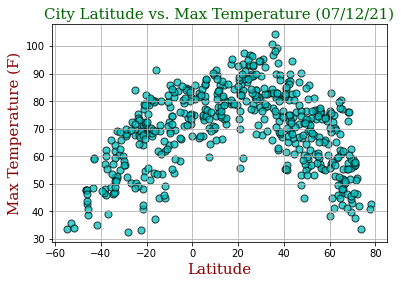

In [22]:
font1 = {'family':'serif','color':'darkgreen','size':15}
font2 = {'family':'serif','color':'darkred','size':15}

# Scatter plot Maximum Temperature Vs. Latitude
plt.scatter(weather_df.iloc[:,2], weather_df.iloc[:, 4], marker='o', 
            edgecolor='black', s=50, alpha=0.75, c ='c', label="Avg Tumor Volume")

# Style formatting title and labels
plt.title("City Latitude vs. Max Temperature (07/12/21)", fontdict=font1)
plt.xlabel('Latitude', fontdict=font2)
plt.ylabel('Max Temperature (F)', fontdict=font2)
plt.grid()

# Exporting png files to the folder PNG
plt.savefig('PNG\lat_temp.png')

## Latitude vs. Humidity Plot

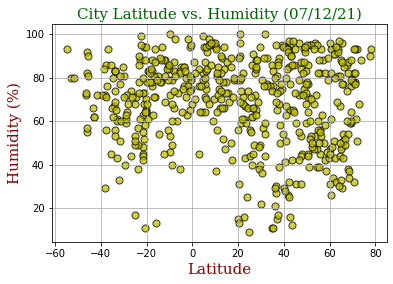

In [23]:
# Scatter plot Humidity (%) Vs. Latitude
plt.scatter(weather_df.iloc[:,2], weather_df.iloc[:, 5], marker='o', 
            edgecolor='black', s=50, alpha=0.75, c ='y', label="Avg Tumor Volume")

# Style formatting title and labels
plt.title("City Latitude vs. Humidity (07/12/21)", fontdict=font1)
plt.xlabel('Latitude', fontdict=font2)
plt.ylabel('Humidity (%)', fontdict=font2)
plt.grid()

# Exporting png files to the folder PNG
plt.savefig('PNG\lat_humid.png')

## Latitude vs. Cloudiness Plot

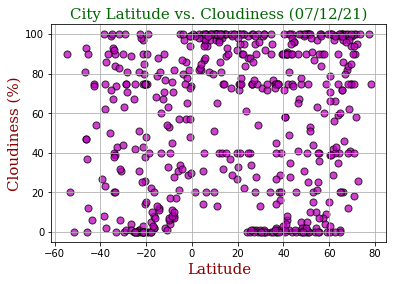

In [24]:
# Scatter plot Cloudiness (%) vs. Latitude
plt.scatter(weather_df.iloc[:,2], weather_df.iloc[:, 6], marker='o', 
            edgecolor='black', s=50, alpha=0.75, c ='m', label="Avg Tumor Volume")

# Style formatting title and labels
plt.title("City Latitude vs. Cloudiness (07/12/21)", fontdict=font1)
plt.xlabel('Latitude', fontdict=font2)
plt.ylabel('Cloudiness (%)', fontdict=font2)
plt.grid()

# Exporting png files to the folder PNG
plt.savefig('PNG\lat_cloud.png')

## Latitude vs. Wind Speed Plot

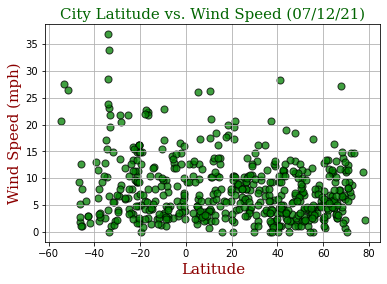

In [25]:
# Scatter plot Wind Speed (mph) Vs. Latitude
plt.scatter(weather_df.iloc[:,2], weather_df.iloc[:, 7], marker='o', 
            edgecolor='black', s=50, alpha=0.75, c ='g', label="Avg Tumor Volume")

# Style formatting title and labels
plt.title("City Latitude vs. Wind Speed (07/12/21)", fontdict=font1)
plt.xlabel('Latitude', fontdict=font2)
plt.ylabel('Wind Speed (mph)',fontdict=font2)
plt.grid()

# Exporting png files to the folder PNG
plt.savefig('PNG\lat_wind_speed.png')

## Linear Regression

In [13]:
# Dependencies importing
import scipy.stats as sts
from scipy.stats import linregress

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

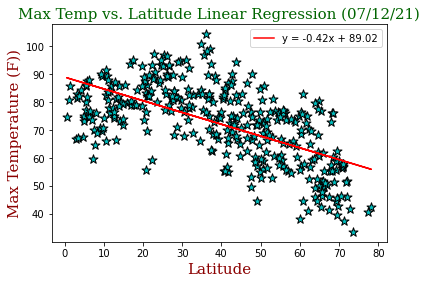

In [26]:
# Northern hemisphere latitude positive values
northern_weather=weather_df.loc[weather_df.Latitude > 0]

# Extracting column values of latitude and max temperature
lat_north=northern_weather['Latitude']
temp_north=northern_weather['Max Temperature']

fig, ax = plt.subplots()

# Finding slope, intercept, rvalue, pvalue and standard error
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_north,temp_north)

# Calculating the regression value
regress_values = lat_north * slope + intercept

# Finding the line equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Scatter plotting
plt.scatter(lat_north,temp_north, c='c', marker='*', s=90, edgecolor='black')

# Regression line plotting
plt.plot(lat_north,regress_values,"r-", label=line_eq)
# plt.annotate(line_eq,(15,15),fontsize=15,color="red")

# Style formatting title and labels
plt.title("Max Temp vs. Latitude Linear Regression (07/12/21)", fontdict=font1)
plt.xlabel('Latitude', fontdict=font2)
plt.ylabel('Max Temperature (F))',fontdict=font2)

ax.legend(loc='best')

# Exporting png files to the folder PNG
plt.savefig('PNG\lat_temp_regr(N).png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

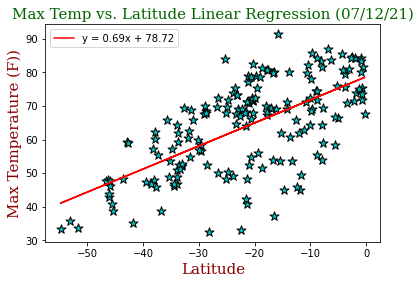

In [27]:
# Southern hemisphere latitude negative values
southern_weather=weather_df.loc[weather_df.Latitude < 0]

# Extracting column values of latitude and max temperature
lat_south=southern_weather['Latitude']
temp_south=southern_weather['Max Temperature']

fig, ax = plt.subplots()

# Finding slope, intercept, rvalue, pvalue and standard error
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_south,temp_south)

# Calculating the regression value
regress_values = lat_south * slope + intercept

# Finding the line equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(lat_south,temp_south, c='c', marker='*', s=90, edgecolor='black')

plt.plot(lat_south,regress_values,"r-", label=line_eq)
# plt.annotate(line_eq,(15,15),fontsize=15,color="red")

# Style formatting title and labels
plt.title("Max Temp vs. Latitude Linear Regression (07/12/21)", fontdict=font1)
plt.xlabel('Latitude', fontdict=font2)
plt.ylabel('Max Temperature (F))',fontdict=font2)

ax.legend(loc='best')

# Exporting png files to the folder PNG
plt.savefig('PNG\lat_temp_regr(S).png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

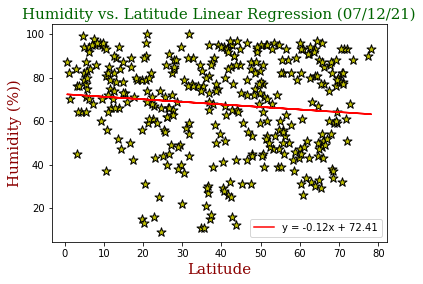

In [28]:
# Extracting column values of Humidity from the dataframe northern_weather
humi_north=northern_weather['Humidity']

fig, ax = plt.subplots()

# Finding slope, intercept, rvalue, pvalue and standard error
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_north,humi_north)

# Calculating the regression value
regress_values = lat_north * slope + intercept

# Finding the line equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Scatter ploting
plt.scatter(lat_north,humi_north, c='y', marker='*', s=90, edgecolor='black')

# Regression line plotting
plt.plot(lat_north,regress_values,"r-", label=line_eq)
# plt.annotate(line_eq,(15,15),fontsize=15,color="red")

# Style formatting title and labels
plt.title("Humidity vs. Latitude Linear Regression (07/12/21)", fontdict=font1)
plt.xlabel('Latitude', fontdict=font2)
plt.ylabel('Humidity (%))',fontdict=font2)

ax.legend(loc='best')

# Exporting png files to the folder PNG
plt.savefig('PNG\lat_humid_regr(N).png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

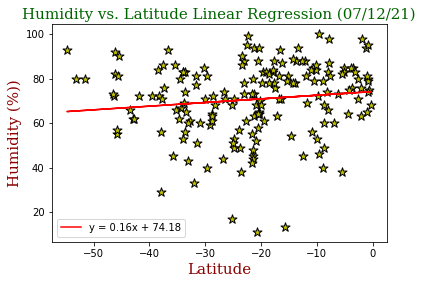

In [29]:
# Extracting column values of Humidity from the dataframe southern_weather
humi_south=southern_weather['Humidity']

fig, ax = plt.subplots()

# Finding slope, intercept, rvalue, pvalue and standard error
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_south,humi_south)

# Calculating the regression value
regress_values = lat_south * slope + intercept

# Finding the line equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Scatter plotting
plt.scatter(lat_south,humi_south, c='y', marker='*', s=90, edgecolor='black')

# Regression line plotting
plt.plot(lat_south,regress_values,"r-", label=line_eq)
# plt.annotate(line_eq,(15,15),fontsize=15,color="red")

# Style formatting title and labels
plt.title("Humidity vs. Latitude Linear Regression (07/12/21)", fontdict=font1)
plt.xlabel('Latitude', fontdict=font2)
plt.ylabel('Humidity (%))',fontdict=font2)

ax.legend(loc=3)

# Exporting png files to the folder PNG
plt.savefig('PNG\lat_humid_regr(S).png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

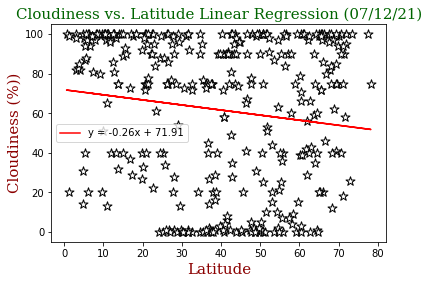

In [30]:
# Extracting column values of cloudiness from the dataframe northern_weather
cloud_north=northern_weather['Cloudiness']

fig, ax = plt.subplots()

# Finding values of slope, intercept, rvalue, pvalue, stderr
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_north,cloud_north)

# Calculating the regression value
regress_values = lat_north * slope + intercept

# Finding the line equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Scatter plotting
plt.scatter(lat_north,cloud_north, c='1', marker='*', s=90, edgecolor='black')

# Regression line plotting
plt.plot(lat_north,regress_values,"r-", label=line_eq)
# plt.annotate(line_eq,(15,15),fontsize=15,color="red")

# Style formatting title and labels
plt.title("Cloudiness vs. Latitude Linear Regression (07/12/21)", fontdict=font1)
plt.xlabel('Latitude', fontdict=font2)
plt.ylabel('Cloudiness (%))',fontdict=font2)

ax.legend(loc=6)

# Exporting png files to the folder PNG
plt.savefig('PNG\lat_cloud_regr(N).png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

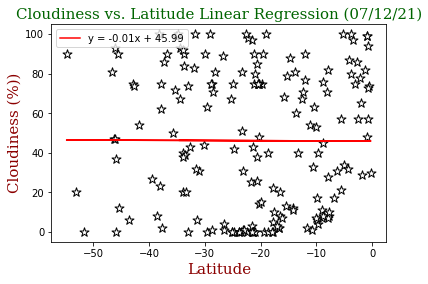

In [31]:
# Extracting column values of cloudiness from the dataframe southern_weather
cloud_south=southern_weather['Cloudiness']

fig, ax = plt.subplots()

# Finding values of slope, intercept, rvalue, pvalue, stderr
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_south,cloud_south)

# Calculating the regression value
regress_values = lat_south * slope + intercept

# Finding the line equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Scatter plotting
plt.scatter(lat_south,cloud_south, c='1', marker='*', s=90, edgecolor='black')

# Regression line plotting
plt.plot(lat_south,regress_values,"r-", label=line_eq)
# plt.annotate(line_eq,(15,15),fontsize=15,color="red")

# Style formatting title and labels
plt.title("Cloudiness vs. Latitude Linear Regression (07/12/21)", fontdict=font1)
plt.xlabel('Latitude', fontdict=font2)
plt.ylabel('Cloudiness (%))',fontdict=font2)

ax.legend(loc='best')

# Exporting png files to the folder PNG
plt.savefig('PNG\lat_cloud_regr(S).png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

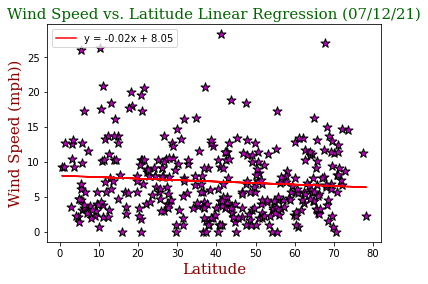

In [32]:
# Extracting column values of wind speed from the dataframe northern_weather
wind_north=northern_weather['Wind Speed']

fig, ax = plt.subplots()

# Finding values of slope, intercept, rvalue, pvalue, stderr
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_north,wind_north)

# Calculating the regression value
regress_values = lat_north * slope + intercept

# Finding the line equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Scatter plotting
plt.scatter(lat_north,wind_north, c='m', marker='*', s=90, edgecolor='black')

# Regression line plotting
plt.plot(lat_north,regress_values,"r-", label=line_eq)
# plt.annotate(line_eq,(15,15),fontsize=15,color="red")

# Style formatting title and labels
plt.title("Wind Speed vs. Latitude Linear Regression (07/12/21)", fontdict=font1)
plt.xlabel('Latitude', fontdict=font2)
plt.ylabel('Wind Speed (mph))',fontdict=font2)

ax.legend(loc='best')

# Exporting png files to the folder PNG
plt.savefig('PNG\lat_wind_regr(N).png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

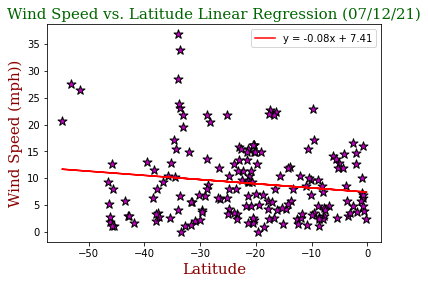

In [34]:
# Extracting column values of wind speed from the dataframe southern_weather 
wind_south=southern_weather['Wind Speed']

fig, ax = plt.subplots()

# Finding values of slope, intercept, rvalue, pvalue, stderr
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_south,wind_south)

# Calculating the regression value
regress_values = lat_south * slope + intercept

# Finding the line equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Scatter plotting
plt.scatter(lat_south,wind_south, c='m', marker='*', s=90, edgecolor='black')

# Regression line plotting
plt.plot(lat_south,regress_values,"r-", label=line_eq)
# plt.annotate(line_eq,(15,15),fontsize=15,color="red")

# Style formatting title and labels
plt.title("Wind Speed vs. Latitude Linear Regression (07/12/21)", fontdict=font1)
plt.xlabel('Latitude', fontdict=font2)
plt.ylabel('Wind Speed (mph))',fontdict=font2)

ax.legend(loc='best')

# Exporting png files to the folder PNG
plt.savefig('PNG\lat_wind_regr(S).png')